In [1]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os

In [2]:
classes = os.listdir('/home/akshay/Downloads/HindiLettersdata/Test/')

In [3]:
classes

['digit_2',
 'digit_7',
 'digit_6',
 'digit_3',
 'digit_5',
 'digit_8',
 'digit_0',
 'digit_9',
 'digit_4',
 'digit_1']

In [19]:
# Loading train data into numpy array
x_train = []
y_train = []
for i in range(10):
    print(i)
    c=0
    for j in os.listdir("/home/akshay/Downloads/HindiLettersdata/Train/" + "digit_" + str(i)):
        c+=1
        img = image.imread("/home/akshay/Downloads/HindiLettersdata/Train/" + 'digit_' + str(i) + "/"+ j)
        x_train.append(img)
        y_train.append(i)
    print(c)

x_train = np.array(x_train)
y_train = np.array(y_train)

0
1700
1
1700
2
1700
3
1700
4
1700
5
1700
6
1700
7
1700
8
1700
9
1700


1


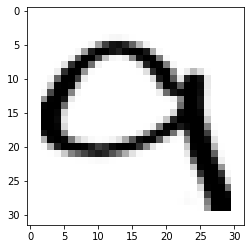

In [20]:
image_index = 2324
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [21]:
# Load test data
x_test = []
y_test = []
for i in range(10):
    print(i)
    c=0
    for j in os.listdir("/home/akshay/Downloads/HindiLettersdata/Test/" + "digit_" + str(i)):
        c+=1
        img = image.imread("/home/akshay/Downloads/HindiLettersdata/Test/" + 'digit_' + str(i) + "/"+ j)
        x_test.append(img)
        y_test.append(i)
    print(c)
    
x_test = np.array(x_test)
y_test = np.array(y_test)

0
300
1
300
2
300
3
300
4
300
5
300
6
300
7
300
8
300
9
300


In [22]:
x_train.shape

(17000, 32, 32)

In [23]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
input_shape = (32, 32, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [24]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (17000, 32, 32, 1)
Number of images in x_train 17000
Number of images in x_test 3000


In [27]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [31]:
batch_size = 250
num_classes = 10
epochs = 10

from keras.callbacks import Callback

class Histories(Callback):

    def on_train_begin(self,logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))


histories = Histories()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[histories]
         )

Train on 17000 samples, validate on 3000 samples
Epoch 1/10
17000/17000 [==============================] - 11s 634us/step - loss: 0.3423 - accuracy: 0.8988 - val_loss: 0.2736 - val_accuracy: 0.9277
Epoch 2/10
17000/17000 [==============================] - 11s 624us/step - loss: 0.2867 - accuracy: 0.9151 - val_loss: 0.2353 - val_accuracy: 0.9330
Epoch 3/10
17000/17000 [==============================] - 11s 630us/step - loss: 0.2474 - accuracy: 0.9253 - val_loss: 0.2090 - val_accuracy: 0.9433
Epoch 4/10
17000/17000 [==============================] - 11s 665us/step - loss: 0.2227 - accuracy: 0.9339 - val_loss: 0.1922 - val_accuracy: 0.9493
Epoch 5/10
17000/17000 [==============================] - 11s 632us/step - loss: 0.1981 - accuracy: 0.9415 - val_loss: 0.1767 - val_accuracy: 0.9507
Epoch 6/10
17000/17000 [==============================] - 11s 641us/step - loss: 0.1815 - accuracy: 0.9472 - val_loss: 0.1667 - val_accuracy: 0.9563
Epoch 7/10
17000/17000 [==============================] -

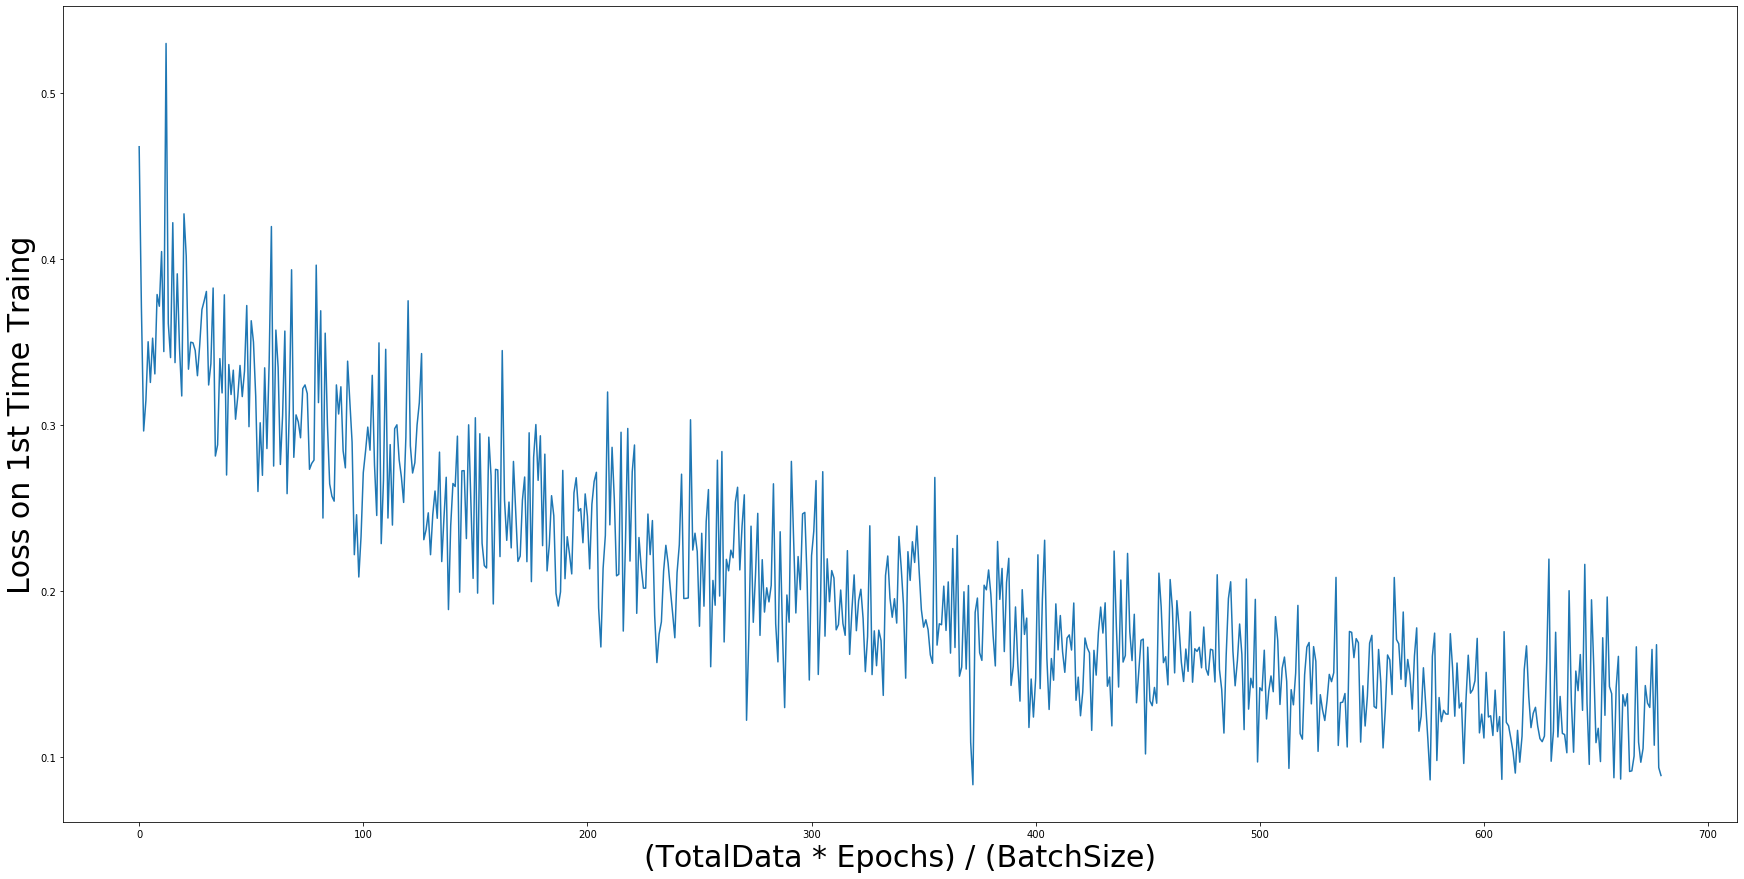

In [39]:
plt.plot(histories.losses[:])
plt.rcParams['figure.figsize'] = [30, 15]
plt.xlabel("(TotalData * Epochs) / (BatchSize)", fontsize=30)
plt.ylabel("Loss on 1st Time Traing", fontsize=30)
plt.show()

In [40]:
batch_size = 250
num_classes = 10
epochs = 10

from keras.callbacks import Callback

class Histories(Callback):

    def on_train_begin(self,logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))


histories = Histories()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[histories]
         )

Train on 17000 samples, validate on 3000 samples
Epoch 1/10
17000/17000 [==============================] - 11s 669us/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.1147 - val_accuracy: 0.9707
Epoch 2/10
17000/17000 [==============================] - 12s 683us/step - loss: 0.1115 - accuracy: 0.9683 - val_loss: 0.1075 - val_accuracy: 0.9720
Epoch 3/10
17000/17000 [==============================] - 11s 639us/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.1029 - val_accuracy: 0.9727
Epoch 4/10
17000/17000 [==============================] - 11s 658us/step - loss: 0.0971 - accuracy: 0.9711 - val_loss: 0.0978 - val_accuracy: 0.9727
Epoch 5/10
17000/17000 [==============================] - 11s 654us/step - loss: 0.0916 - accuracy: 0.9721 - val_loss: 0.0936 - val_accuracy: 0.9743
Epoch 6/10
17000/17000 [==============================] - 11s 636us/step - loss: 0.0860 - accuracy: 0.9743 - val_loss: 0.0902 - val_accuracy: 0.9740
Epoch 7/10
17000/17000 [==============================] -

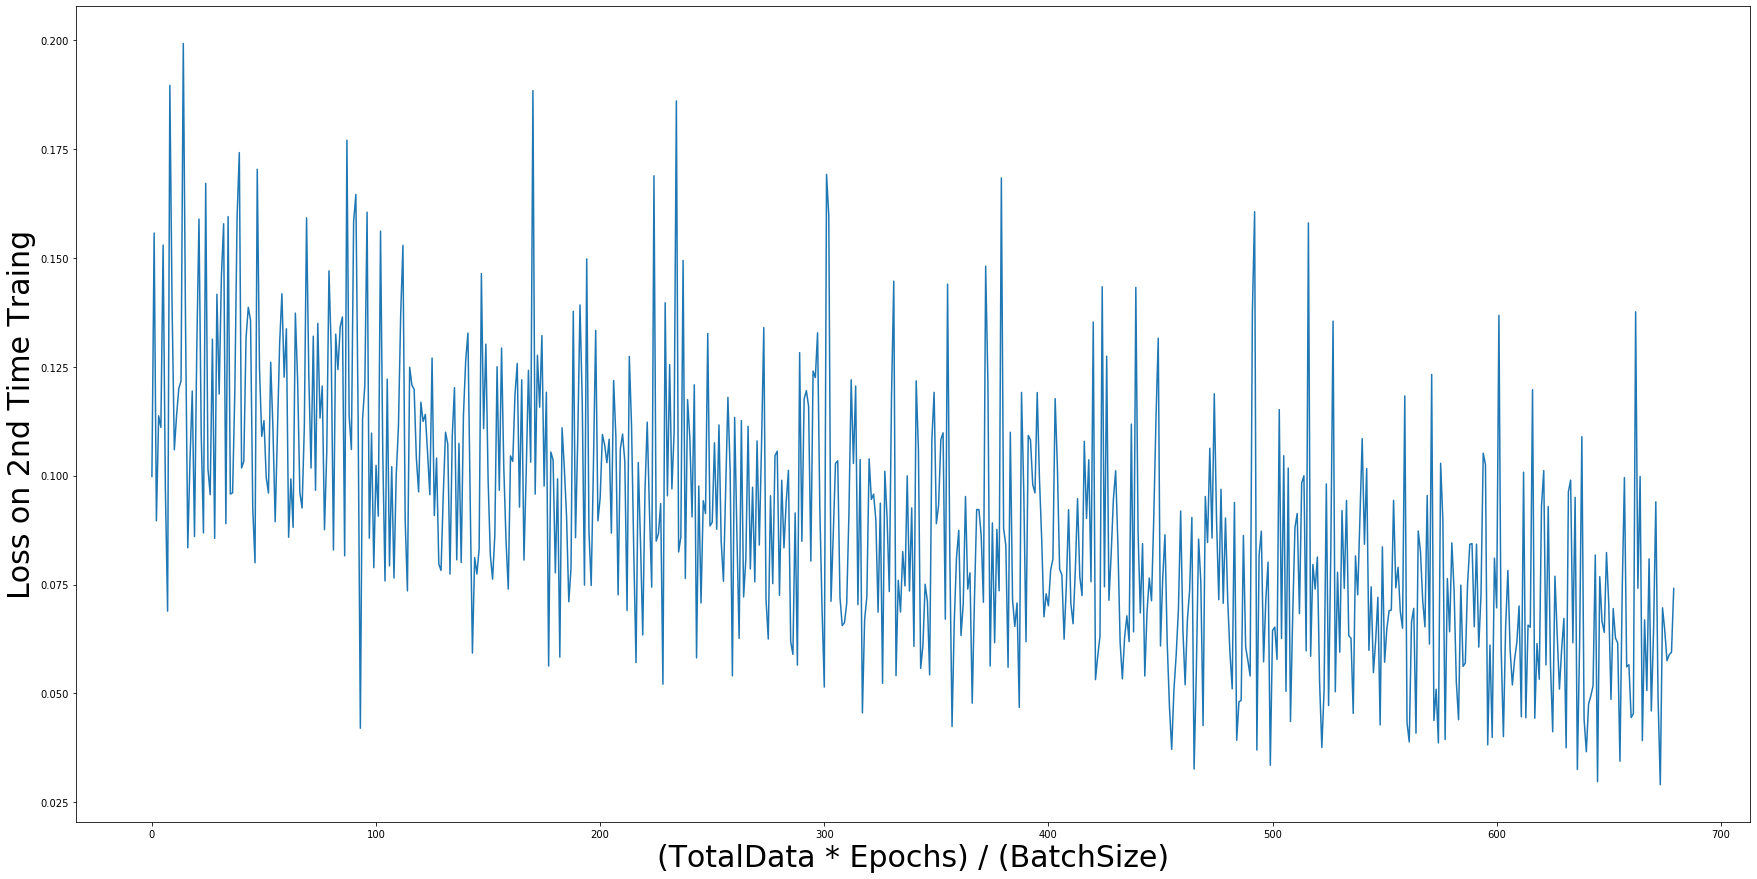

In [41]:
plt.plot(histories.losses[:])
plt.rcParams['figure.figsize'] = [30, 15]
plt.xlabel("(TotalData * Epochs) / (BatchSize)", fontsize=30)
plt.ylabel("Loss on 2nd Time Traing", fontsize=30)
plt.show()